# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

<a id='import_data'></a>

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [2]:
data = pd.read_csv('5000_movies_bis.csv', delimiter = ',')
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


<a id='data_cleaning'></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [4]:
data.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.366000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.637000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.672094e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.938928e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.736555e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.042473e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,4.587414e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.400416e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,5.954872e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.300000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
nb_country = data.country.unique()
nb_country

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [6]:
nb_country = len(nb_country)
nb_country

66

In [7]:
nb_director_name = data.director_name.unique()
nb_director_name = len(nb_director_name)
nb_director_name

2399

In [8]:
nb_director_name_data = data.director_name.value_counts()
nb_director_name_data

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
John Crowley         1
Rob Pritts           1
David S. Ward        1
R.J. Cutler          1
Daniel Hsia          1
Name: director_name, Length: 2398, dtype: int64

In [9]:
acteurs1 = pd.Series(data.actor_1_name.unique())
acteurs1.head()

0        CCH Pounder
1        Johnny Depp
2    Christoph Waltz
3          Tom Hardy
4        Doug Walker
dtype: object

In [10]:
acteurs2 = pd.Series(data.actor_2_name.unique())
acteurs2.head()

0    Joel David Moore
1       Orlando Bloom
2        Rory Kinnear
3      Christian Bale
4          Rob Walker
dtype: object

In [11]:
acteurs3 = pd.Series(data.actor_3_name.unique())
acteurs3.head()

0               Wes Studi
1          Jack Davenport
2        Stephanie Sigman
3    Joseph Gordon-Levitt
4                     NaN
dtype: object

In [12]:
data['acteurs'] = pd.concat([acteurs1, acteurs2, acteurs3], ignore_index=True)
nb_acteurs = data.acteurs.unique()
nb_acteurs = len(nb_acteurs)
nb_acteurs

4049

In [13]:
# REPONSES AUX QUESTIONS DU 2.
# 1) il y a 5043 observations[lignes], 28 variables[colonnes] dans tout le dataset (et sinon 7 observations en méthode head)
# 2) selon la méthode describe et la variable title_year, les données vont de 1916 à 2016 (1916 = min de title_year, et 2016 = max)
# 3) il y a 65 pays différents (et un nan)
# 4) il y 2399 réalisateurs avant nettoyage des données (nan/0)
# 5) il y a 4049 acteurs/actrices avant nettoyage des données (nan/0)

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

# J'ai choisi de supprimer les films en doublons car je n'ai besoin que d'un film; Je conserve les acteurs et réalisateurs qui peuvent apparaitre dans différents films.

In [14]:
nb_movies = data.movie_title.unique()
nb_movies = len(nb_movies)
nb_movies

4917

In [15]:
nb_movies_data = data.movie_title.value_counts()
nb_movies_data

Ben-Hur                 3
Home                    3
Pan                     3
King Kong               3
Halloween               3
                       ..
Splice                  1
The Whole Ten Yards     1
North Country           1
88 Minutes              1
My Date with Drew       1
Name: movie_title, Length: 4917, dtype: int64

In [16]:
data.drop_duplicates(subset ="movie_title", keep = 'first', inplace=True)
data.movie_title.value_counts()

Avatar                     1
The Rose                   1
Glitter                    1
The DUFF                   1
The Namesake               1
                          ..
Meet the Spartans          1
The Cabin in the Woods     1
30 Days of Night           1
Stranger Than Fiction      1
My Date with Drew          1
Name: movie_title, Length: 4917, dtype: int64

#### **Suppression de variables**

In [17]:
# J'ai choisi de supprimer car jugés non-pertinents/essentiels: les likes fb des acteurs/réalisateurs [on garde celui du film], plot_keywords, facenumber_in_poster, lien au site IMDB, content_rating

In [18]:
data.budget.head()

0    237000000.0
1    300000000.0
2    245000000.0
3    250000000.0
4            NaN
Name: budget, dtype: float64

In [19]:
data

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,acteurs
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,CCH Pounder
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Johnny Depp
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Christoph Waltz
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Tom Hardy
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Doug Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,Ana Maria Guran
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,William Mapother
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,Joe Lev
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,Aaron Stanford


In [20]:
data.drop(['actor_1_fb_likes','actor_2_fb_likes','actor_3_fb_likes','director_fb_likes','movie_imdb_link','facenumber_in_poster','plot_keywords','content_rating'], axis='columns', inplace=True)


#### **Les valeurs manquantes et les zéros**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4898 non-null   object 
 1   director_name           4815 non-null   object 
 2   num_critic_for_reviews  4868 non-null   float64
 3   duration                4902 non-null   float64
 4   actor_2_name            4904 non-null   object 
 5   gross                   4249 non-null   float64
 6   genres                  4917 non-null   object 
 7   actor_1_name            4910 non-null   object 
 8   movie_title             4917 non-null   object 
 9   num_voted_users         4917 non-null   int64  
 10  cast_total_fb_likes     4917 non-null   int64  
 11  actor_3_name            4894 non-null   object 
 12  num_user_for_reviews    4896 non-null   float64
 13  language                4905 non-null   object 
 14  country                 4912 non-null   

**Gestion des zéros**

In [22]:
liste_columns = []
for col in data.columns:
    liste_columns.append(col)
print(liste_columns)

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_fb_likes', 'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_fb_likes', 'acteurs']


In [23]:
filtre = data[liste_columns] == 0
filtre.sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
actor_2_name                 0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_fb_likes         33
actor_3_name                 0
num_user_for_reviews         0
language                     0
country                      0
budget                       0
title_year                   0
imdb_score                   0
aspect_ratio                 0
movie_fb_likes            2131
acteurs                      0
dtype: int64

In [24]:
# suppression des 0
data = data[(data!=0)]
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,acteurs
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,Wes Studi,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,CCH Pounder
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,Jack Davenport,1238.0,English,USA,300000000.0,2007.0,7.1,2.35,NaN,Johnny Depp
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,Stephanie Sigman,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Christoph Waltz
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Tom Hardy
4,NaN,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN,NaN,Doug Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,Daphne Zuniga,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,...,Crystal Lowe,6.0,English,Canada,NaN,2013.0,7.7,NaN,84.0,Ana Maria Guran
5039,Color,NaN,43.0,43.0,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,...,Sam Underwood,359.0,English,USA,NaN,NaN,7.5,16.00,32000.0,William Mapother
5040,Color,Benjamin Roberds,13.0,76.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,...,David Chandler,3.0,English,USA,1400.0,2013.0,6.3,NaN,16.0,Joe Lev
5041,Color,Daniel Hsia,14.0,100.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,...,Eliza Coupe,9.0,English,USA,NaN,2012.0,6.3,2.35,660.0,Aaron Stanford


**Gestion des NaN**

In [25]:
# Suppression des nan sur toutes les lignes du dataset

In [26]:
data.color.isnull().sum()

19

In [27]:
liste_columns = []
for col in data.columns:
    liste_columns.append(col)
print(liste_columns)

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_fb_likes', 'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_fb_likes', 'acteurs']


In [28]:
data.dropna(axis = 0, subset=liste_columns, inplace=True)
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,acteurs
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,Wes Studi,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,CCH Pounder
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,Stephanie Sigman,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Christoph Waltz
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Tom Hardy
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,Polly Walker,738.0,English,USA,263700000.0,2012.0,6.6,2.35,24000.0,Daryl Sabara
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,M.C. Gainey,387.0,English,USA,260000000.0,2010.0,7.8,1.85,29000.0,Brad Garrett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,Béatrice Dalle,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,...,Don McKellar,39.0,French,France,4500.0,2004.0,6.9,2.35,171.0,Bertrand Cantat
5027,Color,Jafar Panahi,64.0,90.0,Nargess Mamizadeh,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,...,Mojgan Faramarzi,26.0,Persian,Iran,10000.0,2000.0,7.5,1.85,697.0,Sylvia Eckhausen
5029,Color,Kiyoshi Kurosawa,78.0,111.0,Anna Nakagawa,94596.0,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,...,Denden,50.0,Japanese,Japan,1000000.0,1997.0,7.4,1.85,817.0,Jordan Bridges
5033,Color,Shane Carruth,143.0,77.0,David Sullivan,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,...,Casey Gooden,371.0,English,USA,7000.0,2004.0,7.0,1.85,19000.0,Alex Emanuel


In [29]:
# suppression des nan (color en avait 19 par exemple)
data.color.isnull().sum()

0

#### **Modification de variables**

In [30]:
# j'ai décidé de ne conserver que le 1er genre dans la colonne genres par souci de simplification

In [31]:
new_genres = pd.Series(data.genres)
liste_genres = []
for genre in new_genres:
    liste_genres.append(genre)
liste_genres[0:5]

['Action|Adventure|Fantasy|Sci-Fi',
 'Action|Adventure|Thriller',
 'Action|Thriller',
 'Action|Adventure|Sci-Fi',
 'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance']

In [32]:
new_list = []
for mot in liste_genres:
    new_list.append(mot.split("|"))
new_list[0:5]

[['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure',
  'Animation',
  'Comedy',
  'Family',
  'Fantasy',
  'Musical',
  'Romance']]

In [33]:
last_list = []
for mot in new_list:
    last_list.append(mot[0])
last_list[0:5]

['Action', 'Action', 'Action', 'Action', 'Adventure']

In [34]:
data['first_genre'] = last_list
data['first_genre']

0            Action
2            Action
3            Action
5            Action
7         Adventure
           ...     
5026          Drama
5027          Drama
5029          Crime
5033          Drama
5042    Documentary
Name: first_genre, Length: 2112, dtype: object

In [35]:
data.drop(["genres"], axis='columns', inplace=True)
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,...,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,acteurs,first_genre
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834.0,...,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,CCH Pounder,Action
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700.0,...,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Christoph Waltz,Action
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759.0,...,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Tom Hardy,Action
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873.0,...,738.0,English,USA,263700000.0,2012.0,6.6,2.35,24000.0,Daryl Sabara,Action
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Brad Garrett,Tangled,294810,2036.0,...,387.0,English,USA,260000000.0,2010.0,7.8,1.85,29000.0,Brad Garrett,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,Béatrice Dalle,136007.0,Maggie Cheung,Clean,3924,776.0,...,39.0,French,France,4500.0,2004.0,6.9,2.35,171.0,Bertrand Cantat,Drama
5027,Color,Jafar Panahi,64.0,90.0,Nargess Mamizadeh,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,5.0,...,26.0,Persian,Iran,10000.0,2000.0,7.5,1.85,697.0,Sylvia Eckhausen,Drama
5029,Color,Kiyoshi Kurosawa,78.0,111.0,Anna Nakagawa,94596.0,Kôji Yakusho,The Cure,6318,115.0,...,50.0,Japanese,Japan,1000000.0,1997.0,7.4,1.85,817.0,Jordan Bridges,Crime
5033,Color,Shane Carruth,143.0,77.0,David Sullivan,424760.0,Shane Carruth,Primer,72639,368.0,...,371.0,English,USA,7000.0,2004.0,7.0,1.85,19000.0,Alex Emanuel,Drama


In [36]:
data.drop(["acteurs"], axis='columns', inplace=True)
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,first_genre
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834.0,Wes Studi,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,Action
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700.0,Stephanie Sigman,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Action
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759.0,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Action
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873.0,Polly Walker,738.0,English,USA,263700000.0,2012.0,6.6,2.35,24000.0,Action
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Brad Garrett,Tangled,294810,2036.0,M.C. Gainey,387.0,English,USA,260000000.0,2010.0,7.8,1.85,29000.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,Béatrice Dalle,136007.0,Maggie Cheung,Clean,3924,776.0,Don McKellar,39.0,French,France,4500.0,2004.0,6.9,2.35,171.0,Drama
5027,Color,Jafar Panahi,64.0,90.0,Nargess Mamizadeh,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,5.0,Mojgan Faramarzi,26.0,Persian,Iran,10000.0,2000.0,7.5,1.85,697.0,Drama
5029,Color,Kiyoshi Kurosawa,78.0,111.0,Anna Nakagawa,94596.0,Kôji Yakusho,The Cure,6318,115.0,Denden,50.0,Japanese,Japan,1000000.0,1997.0,7.4,1.85,817.0,Crime
5033,Color,Shane Carruth,143.0,77.0,David Sullivan,424760.0,Shane Carruth,Primer,72639,368.0,Casey Gooden,371.0,English,USA,7000.0,2004.0,7.0,1.85,19000.0,Drama


In [37]:
data.color.value_counts()

Color               2043
 Black and White      69
Name: color, dtype: int64

In [38]:
# transformation avec dummies de la colonne color en binaire

In [39]:
data = pd.concat((data.drop('color', axis=1), pd.get_dummies(data.color, drop_first=True)), axis=1)
data

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,first_genre,Color
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834.0,Wes Studi,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,Action,1
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700.0,Stephanie Sigman,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Action,1
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759.0,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Action,1
5,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873.0,Polly Walker,738.0,English,USA,263700000.0,2012.0,6.6,2.35,24000.0,Action,1
7,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Brad Garrett,Tangled,294810,2036.0,M.C. Gainey,387.0,English,USA,260000000.0,2010.0,7.8,1.85,29000.0,Adventure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,Béatrice Dalle,136007.0,Maggie Cheung,Clean,3924,776.0,Don McKellar,39.0,French,France,4500.0,2004.0,6.9,2.35,171.0,Drama,1
5027,Jafar Panahi,64.0,90.0,Nargess Mamizadeh,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,5.0,Mojgan Faramarzi,26.0,Persian,Iran,10000.0,2000.0,7.5,1.85,697.0,Drama,1
5029,Kiyoshi Kurosawa,78.0,111.0,Anna Nakagawa,94596.0,Kôji Yakusho,The Cure,6318,115.0,Denden,50.0,Japanese,Japan,1000000.0,1997.0,7.4,1.85,817.0,Crime,1
5033,Shane Carruth,143.0,77.0,David Sullivan,424760.0,Shane Carruth,Primer,72639,368.0,Casey Gooden,371.0,English,USA,7000.0,2004.0,7.0,1.85,19000.0,Drama,1


## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [40]:
data.corr()

,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_fb_likes,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,Color
num_critic_for_reviews,1.000000,0.289652,0.527699,0.599965,0.363723,0.578918,0.149864,0.427729,0.429149,0.124969,0.772067,0.029002
duration,0.289652,1.000000,0.277059,0.396291,0.202612,0.397155,0.125585,-0.085756,0.402974,0.094545,0.293674,-0.043443
gross,0.527699,0.277059,1.000000,0.622621,0.340849,0.571764,0.186712,0.135316,0.272942,0.056465,0.457496,0.061594
num_voted_users,0.599965,0.396291,0.622621,1.000000,0.336984,0.842017,0.110482,0.018428,0.553259,0.061321,0.555427,-0.038631
cast_total_fb_likes,0.363723,0.202612,0.340849,0.336984,1.000000,0.276969,0.086696,0.198576,0.172246,0.075447,0.338010,0.066620
num_user_for_reviews,0.578918,0.397155,0.571764,0.842017,0.276969,1.000000,0.113001,0.020030,0.429766,0.067626,0.479550,-0.035251
budget,0.149864,0.125585,0.186712,0.110482,0.086696,0.113001,1.000000,0.089666,0.067071,0.044276,0.110286,0.037199
title_year,0.427729,-0.085756,0.135316,0.018428,0.198576,0.020030,0.089666,1.000000,-0.054244,0.189203,0.341166,0.208095
imdb_score,0.429149,0.402974,0.272942,0.553259,0.172246,0.429766,0.067071,-0.054244,1.000000,0.046439,0.383177,-0.107490
aspect_ratio,0.124969,0.094545,0.056465,0.061321,0.075447,0.067626,0.044276,0.189203,0.046439,1.000000,0.098726,0.058847


In [41]:
# 1ère visualisation: scatterplot pour mettre en rapport budget et gross(revenus générés), ainsi que les notes en scatter. On remarque que la variable gross n'est absolument pas corrélée au budget. On ne tire pas d'enseignement sur la notation.

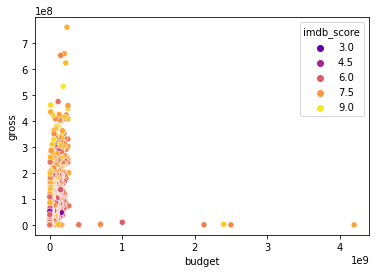

In [42]:
sns.scatterplot(data=data, x='budget', y ='gross', hue='imdb_score', palette='plasma');

In [43]:
# 2ème visualisation: une heatmap de corrélations générales. La couleur du film ou l'année de sortie n'ont aucune influence (0/noir). A contrario, num_voted_users en orange est la variable la plus importante, ainsi que num_critic_for_reviews par exemple.

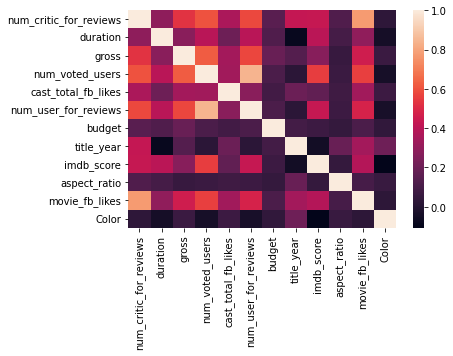

In [44]:
sns.heatmap(data.corr());

In [45]:
# 3ème visualisation: un pairplot mettant en relation toutes les variables. Les résultats sont identiques dans l'idée au heatmap, mais cela est visuellement sous forme de nuages, histogrammes...

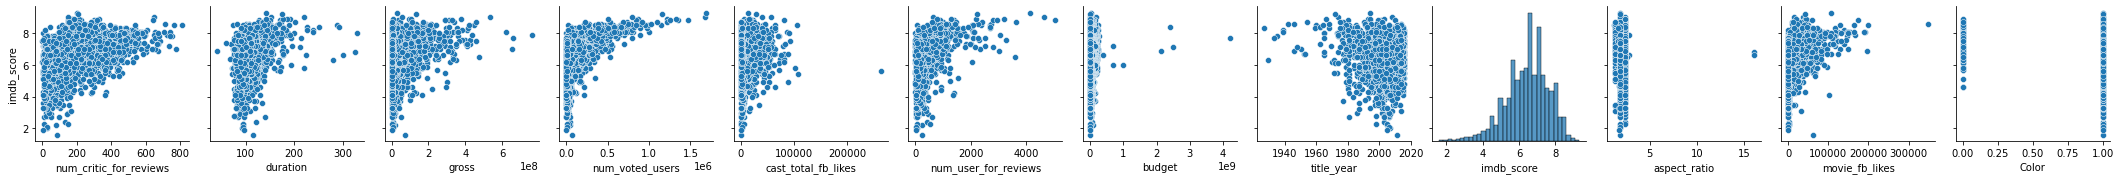

In [46]:
sns.pairplot(data, y_vars=['imdb_score']);

In [47]:
# 4ème visualisation: une boxplot sur les couleurs. 0=noir et blanc, et 1=film en couleur. Les films en couleur semblent un peu mieux notés.

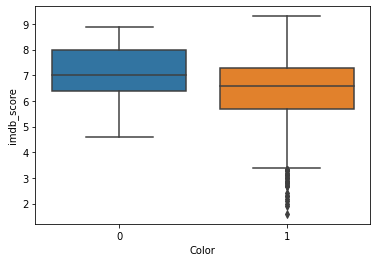

In [48]:
sns.boxplot(data=data, x='Color', y ='imdb_score');

In [49]:
# 5ème visualisation: violinplot/boxplot sur les genres de films. Difficile d'en tirer une conclusion générale, on remarquera des situations comme par exemple les biographies mieux notées que les comédies, ou les westernes dont les notes sont très hétérogènes.

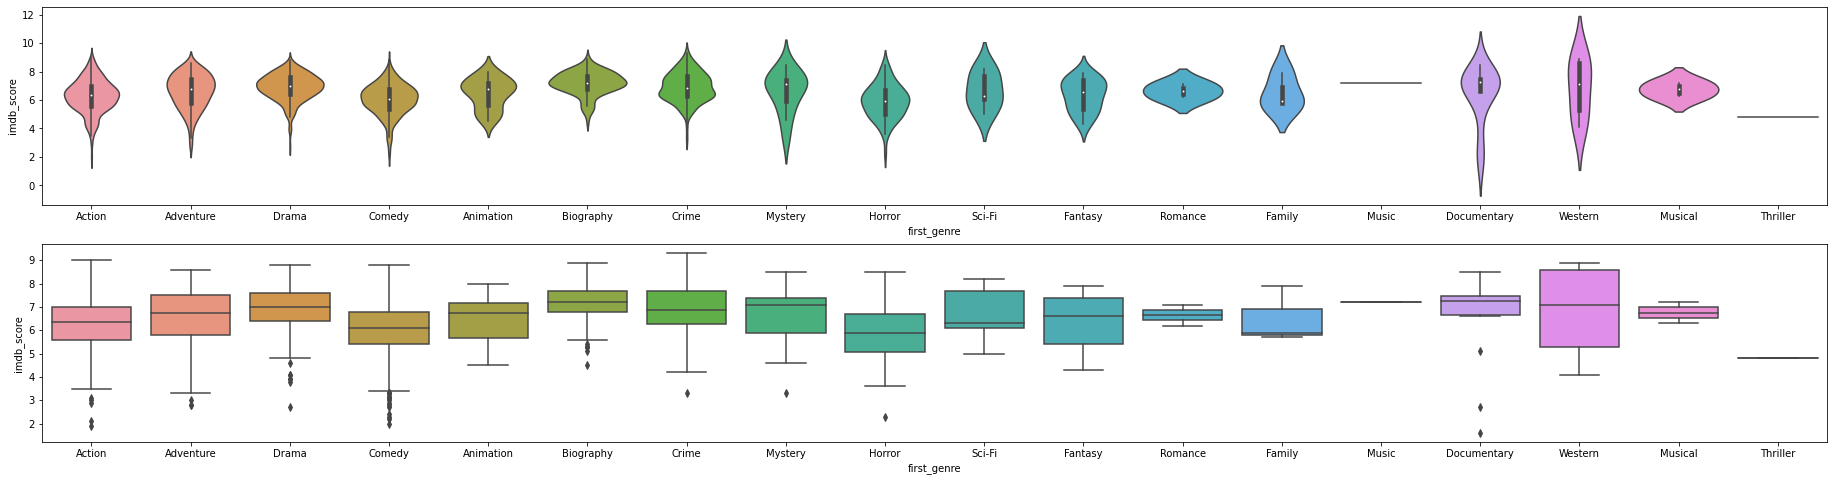

In [50]:
fig, axes = plt.subplots(2,1,figsize=(32,8))
fig.subplots_adjust(wspace = 0.3)
ax1 = sns.violinplot(data=data, x='first_genre', y='imdb_score', ax = axes[0])
ax2 = sns.boxplot(data=data, x='first_genre', y='imdb_score', ax = axes[1])
plt.show()

In [51]:
# 6ème visualisation: Scatterplot met en lumière l'une des variables explicatives majeures (num_voted_users) en rapport aux notes IMDB.Cette variable est positivement corrélée. 

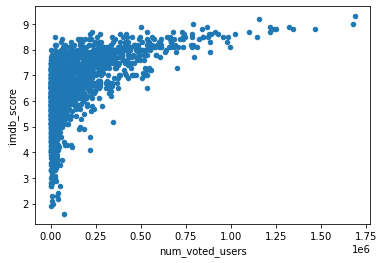

In [52]:
fig, ax = plt.subplots()
ax.scatter(data.num_voted_users, data.imdb_score, s=20)
ax.set_xlabel('num_voted_users')
ax.set_ylabel('imdb_score');

In [53]:
# 7ème visualisation: Méthode scatter de sns. le num_user_for_reviews est une variable explicative importante. Là aussi plus le nombre est important, plus le score le sera. La variable est toutefois de second rang.

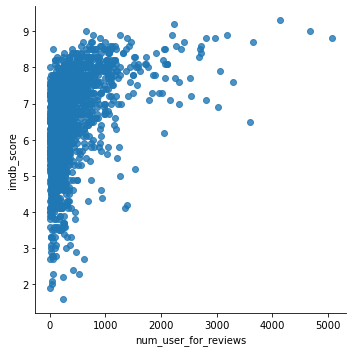

In [54]:
sns.lmplot(data=data,x='num_user_for_reviews', y ='imdb_score',fit_reg=False);

In [55]:
# 8ème visualisaition: le num_critic_for_reviews est une variable explicative très importante, on remarque aisément que plus le nombre de critic_for_reviews augmente, plus la note moyenne de IMDB est bonne.

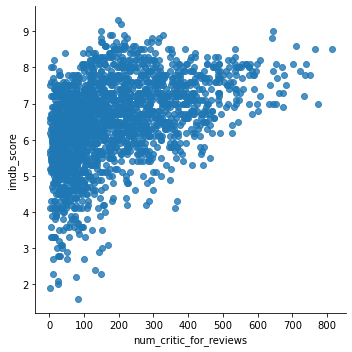

In [56]:
sns.lmplot(data=data,x='num_critic_for_reviews', y ='imdb_score',fit_reg=False);

In [57]:
# 9ème visualisation: le budget n'a aucune corrélation avec le score IMDB. 

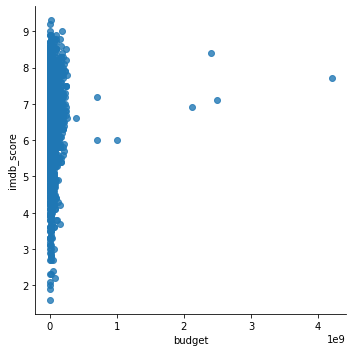

In [58]:
sns.lmplot(data=data,x='budget', y ='imdb_score',fit_reg=False);

In [59]:
# 10ème visualisation: le gross (revenus) n'a qu'assez peu de corrélation avec la notation, mais plus que par rapport au budget.

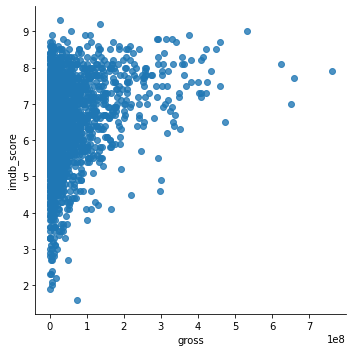

In [60]:
sns.lmplot(data=data,x='gross', y ='imdb_score',fit_reg=False);

<a id='preprocess'></a>

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [ ]:
# Suppression de colonnes inutiles à ce stade: acteurs et réalisateurs sont supprimés.

In [61]:
data.drop(["director_name", "actor_1_name","actor_2_name","actor_3_name"], axis='columns', inplace=True)
data

,num_critic_for_reviews,duration,gross,movie_title,num_voted_users,cast_total_fb_likes,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_fb_likes,first_genre,Color
0,723.0,178.0,760505847.0,Avatar,886204,4834.0,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000.0,Action,1
2,602.0,148.0,200074175.0,Spectre,275868,11700.0,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000.0,Action,1
3,813.0,164.0,448130642.0,The Dark Knight Rises,1144337,106759.0,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000.0,Action,1
5,462.0,132.0,73058679.0,John Carter,212204,1873.0,738.0,English,USA,263700000.0,2012.0,6.6,2.35,24000.0,Action,1
7,324.0,100.0,200807262.0,Tangled,294810,2036.0,387.0,English,USA,260000000.0,2010.0,7.8,1.85,29000.0,Adventure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,81.0,110.0,136007.0,Clean,3924,776.0,39.0,French,France,4500.0,2004.0,6.9,2.35,171.0,Drama,1
5027,64.0,90.0,673780.0,The Circle,4555,5.0,26.0,Persian,Iran,10000.0,2000.0,7.5,1.85,697.0,Drama,1
5029,78.0,111.0,94596.0,The Cure,6318,115.0,50.0,Japanese,Japan,1000000.0,1997.0,7.4,1.85,817.0,Crime,1
5033,143.0,77.0,424760.0,Primer,72639,368.0,371.0,English,USA,7000.0,2004.0,7.0,1.85,19000.0,Drama,1


<a id='reglin'></a>

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

<a id='autres_reg'></a>

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

<a id='irr'></a>

<a id='reg_to_class'></a>

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

<a id='reglog'></a>

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  